<a href="https://colab.research.google.com/github/santhoshsrivi/BITS/blob/main/DM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from apyori import apriori
from nltk.stem import PorterStemmer

In [3]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=bb58af811e9f579c83efcc896b8d15fc7d5ce1522487ccca0f02462cf7027d47
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


# Below Code Reads The Dataset from Excel into a Pandas Dataframe

In [5]:
#The below code reads the datset into a pandas dataframe

data=pd.read_excel('Dataset.xlsx',header=None)
#data=pd.read_excel('trial1.xlsx',header=None)

# The next few cells perform the data preprocessing

In [6]:
#In this cell we intend to collect all the items in the list after removing leading trailing whitespaces from the string

list_of_items=[]
for i in range(data.shape[1]):
    for j in range(data.shape[0]):
        if not pd.isnull(data[i][j]):# and data[i][j]!='mineral water' :
            list_of_items.append(data[i][j].strip())
            

In [7]:
#In this cell we intend to convert all the words to lower case because the market basket analysis we do should be 
#case insensitive which means burger and Burger should be treated as same

list_of_items_lower=[]

for i in range(len(list_of_items)):
    list_of_items_lower.append(list_of_items[i].lower())

In [8]:
#Here we check if lowercasing is actually necessary. 
#To do that we will find the length of the original list and lower cased list
#Since it is observed the result of the below is true, everything is already lower cased and there is no conflicts in case
#and the case of words is consistent. Hence actually the previous step was not necessary


len(list(set(list_of_items)))==len(list(set(list_of_items_lower)))

True

In [9]:
def porterStemmedWord(s):
    porter = PorterStemmer()
    separator=" "
    ls=[]
    for w in s.split(" "):
        ls.append(porter.stem(w))
    return separator.join(ls).strip()
    
    

In [10]:
#In this cell we intend to stem the words because words in singular or plural should not matter. 
#For example Burger and Burgers should be treated as same
#here we use a dictionary where key is stemmed word and value is a list of all original lower cased words


dicti_of_items_lower_stemmed={}

for i in range(len(list_of_items_lower)): 
    dicti_of_items_lower_stemmed[porterStemmedWord(list_of_items_lower[i])]=[]

for i in range(len(list_of_items_lower)):
    dicti_of_items_lower_stemmed[porterStemmedWord(list_of_items_lower[i])].append(list_of_items_lower[i])
    
for i in range(len(list_of_items_lower)):
    dicti_of_items_lower_stemmed[porterStemmedWord(list_of_items_lower[i])]=list(set(dicti_of_items_lower_stemmed[porterStemmedWord(list_of_items_lower[i])]))



In [11]:
#In This Cell we check if the last step of porter stemmer is actually necessary. The way to check this is by checking the length
#of all value lists in the last dictionary. If the length is 1 then, there can be either a singular occurence or 
#plural occurence but not both

flag=0
for key,value in dicti_of_items_lower_stemmed.items():
    if len(value)>1:
        flag=1
        print("The last step was necessary")
if flag==0:
    print("The porter stemmer step was not necessary")

The porter stemmer step was not necessary


In [12]:
#In This Cell, we convert the pandas dataframe into a list of lists that is suitable for the input of Market 
#Basket Analysis (Apriori Algorithm)

records=[]

for i in range(data.shape[0]):
    records.append([str(data.values[i,j]) for j in range(data.shape[1])])


Null_Free_records_v1=[]
for i in range(len(records)):
    Null_Free_records_v1.append([])
    for j in range(len(records[i])):
        if records[i][j]!='nan': #and records[i][j]!='mineral water':
            Null_Free_records_v1[len(Null_Free_records_v1)-1].append(records[i][j])
            

Null_Free_records=[]
for i in range(len(Null_Free_records_v1)):
    if len(Null_Free_records_v1[i])>0:
        Null_Free_records.append(Null_Free_records_v1[i])
        

        


            
    

# The Next Few Cells Perform The Exploratory Data Analysis

In [13]:
#Here we intend to find the total number of transactions and maximum number of items in each transaction.
#So from the output we can see that we have 7501 transactions and maximum of 20 items in any transaction

data.shape

(7501, 20)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

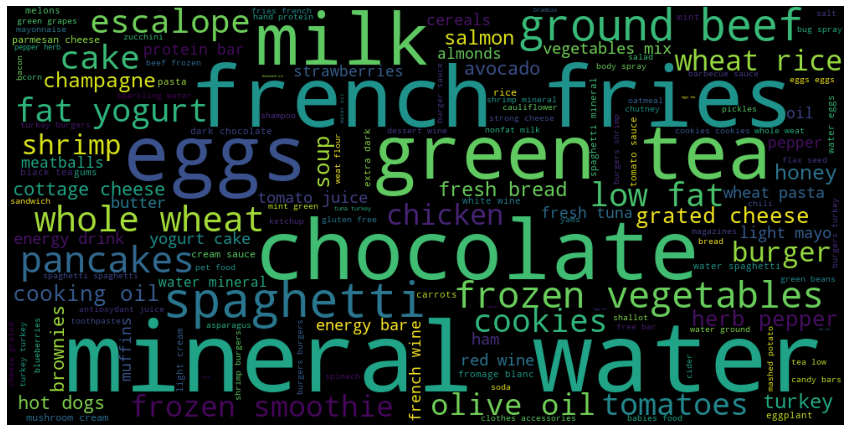

In [15]:
unique_string=(" ").join(list_of_items)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()


#From the below, One suggestion we can give to the business is that they should always have "Milk", "French Fries",
#"Mineral Water","Spagetti" in stock because from the below word cloud it looks like these are most prefered 
#items among customers. This is intended to primarily show the distribution of words

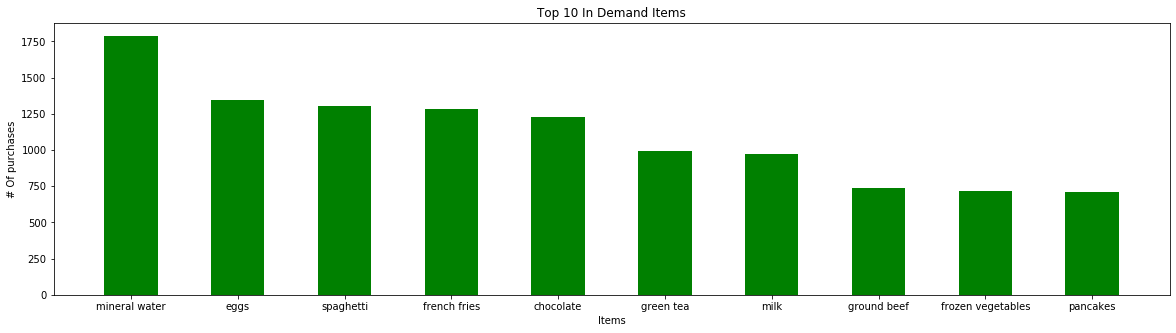

In [ ]:
from collections import Counter

counts=Counter(list_of_items)
data_dict={}
for i in range(len(counts.most_common(10))):
    data_dict[counts.most_common(10)[i][0]]=counts.most_common(10)[i][1]

fig = plt.figure(figsize = (20, 5))
#  Bar plot
plt.bar(list(data_dict.keys()), list(data_dict.values()), color ='green',
        width = 0.5)
plt.xlabel("Items")
plt.ylabel("# Of purchases")
plt.title("Top 10 In Demand Items")
plt.show()


#Below Plot conveys the top 10 in demand items. By this the business can take actions like
#1)keep these items in high stock
#2)Provide some discounts on these items to attract customers
#3)Give some offers like Buy 1 Get 1 Free. For example if customer purchases 1 KG of green tea, then give them an additional 
#0.25 KG for free  

# Pre-Processing Based on Domain Knowledge and Exploratory Data Analysis

In [ ]:
#Based on the insights from Exploratory Data Analysis, 
#we have decided to remove mineral water from the list 
#before we apply the algorithm because mineral water is 
#sort of obvious purchase by the customer in most cases 
#because even if we don’t recommend mineral water to the customer, 
#they are still bound to purchase it. So just by keeping this product 
#there is no hidden pattern we are discovering. Hence we are removing it

Transaction_List=[]

for i in range(len(Null_Free_records)):
    Transaction_List.append([])
    for j in range(len(Null_Free_records[i])):
        if Null_Free_records[i][j]!='mineral water':
            Transaction_List[len(Transaction_List)-1].append(Null_Free_records[i][j])
            
        
    



# Applying the Apriori Model

In [ ]:
association_rules=apriori(Transaction_List,min_support=0.01,max_length=7501,min_lift=0.0,min_confidence=0.0)
association_results=list(association_rules)
item_set_list=[]
rule_list=[]
rule_list_A_C=[]
for i in range(len(association_results)):
    flag=0
    item_set_list.append([{'item_set':str(list(association_results[i][0]))},{'support':association_results[i][1]}])
    for j in range(len(association_results[i].ordered_statistics)):
        #if len(list(association_results[i].ordered_statistics[j].items_base))>=0:
        rule_list_A_C.append([tuple(list(association_results[i].ordered_statistics[j].items_base)),tuple(list(association_results[i].ordered_statistics[j].items_add)),association_results[i][1],association_results[i].ordered_statistics[j].confidence,association_results[i].ordered_statistics[j].lift])


rules_dataframe=pd.DataFrame(rule_list_A_C)
rules_dataframe.rename(columns={0:"Antecedent",1:"Consequent",2:"Support",3:"Confidence",4:"lift"},inplace=True)
rules_dataframe.sort_values(by=['Support','Confidence','lift'],ascending=[False,False,False],inplace = True)
print("Number Of Rules is :",len(rules_dataframe.index))
print("******************************************************************************************\n")
print("List Of Rules is \n")
print(rules_dataframe.to_string())
      

Number Of Rules is : 493
******************************************************************************************

List Of Rules is 

                 Antecedent                           Consequent   Support  Confidence      lift
19                       ()                              (eggs,)  0.179709    0.179709  1.000000
62                       ()                         (spaghetti,)  0.174110    0.174110  1.000000
24                       ()                      (french fries,)  0.170911    0.170911  1.000000
13                       ()                         (chocolate,)  0.163845    0.163845  1.000000
32                       ()                         (green tea,)  0.132116    0.132116  1.000000
45                       ()                              (milk,)  0.129583    0.129583  1.000000
33                       ()                       (ground beef,)  0.098254    0.098254  1.000000
30                       ()                 (frozen vegetables,)  0.095321    0.095321  

In [ ]:
#Since we are not very clear as what to take as the support and confidence threshold, we can recommend those rules 
#to the business where the lift of a rule is higher than 1.5. For example in the first row, a lift of 3.25 means that the
#likelihood of purchasing "herb & Pepper" and "ground beef" is 3.25 times higher than just purchasing "ground beef". 
#We are ordering the insightful rules in descending order of lift so that business gets the best rules first

insightful_rules_dataframe=rules_dataframe[rules_dataframe['lift']>=2]
insightful_rules_dataframe.sort_values(by=['lift'],ascending=[False],inplace=True)
print("Number Of Insightful Rules is :",len(insightful_rules_dataframe.index))
print('****************************************************************************************\n')
print(insightful_rules_dataframe.to_string())

Number Of Insightful Rules is : 20
****************************************************************************************

                 Antecedent              Consequent   Support  Confidence      lift
388        (herb & pepper,)          (ground beef,)  0.015998    0.323450  3.291994
387          (ground beef,)        (herb & pepper,)  0.015998    0.162822  3.291994
358             (tomatoes,)    (frozen vegetables,)  0.016131    0.235867  2.474464
357    (frozen vegetables,)             (tomatoes,)  0.016131    0.169231  2.474464
352               (shrimp,)    (frozen vegetables,)  0.016664    0.233209  2.446574
351    (frozen vegetables,)               (shrimp,)  0.016664    0.174825  2.446574
430                 (soup,)                 (milk,)  0.015198    0.300792  2.321232
429                 (milk,)                 (soup,)  0.015198    0.117284  2.321232
466             (tomatoes,)               (shrimp,)  0.011199    0.163743  2.291481
465               (shrimp,)        

C:\Users\Raj Aditya Kumar\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
